In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import WindroseAxes
from scipy.optimize import curve_fit

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return

In [12]:
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)
def cifras_signif(i, cifras):
    texto = str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
    return texto
def lineal(x, a, b):
    linea = a*x + b
    return linea
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y, inicial = [1,1], pesos = None):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(f = modelo,
                                    xdata = x,
                                    ydata = y,
                                    #sigma = pesos,
                                    p0 = inicial
                                   )
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    residuo = y - predicciones
    return predicciones, ajuste, errores, r_cuadrado, residuo
def grafico_modelo(x, y, predicciones, ajuste,
                   errores, r_cuad, nombres,
                   j = 3
                  ):
    etiqueta = ''
    iterador = list(range(len(nombres)))
    for i in iterador:
        valor = cifras_signif(ajuste[i], j)
        error = cifras_signif(errores[i], j)
        etiqueta = (etiqueta
                    + ' ' + nombres[i] + ' = ' + valor
                    + '; std ' + nombres[i] + ' = ' + error
                    + '\n')
    etiqueta = etiqueta + ' $R^2$ = ' + cifras_signif(r_cuad, j)
    plt.plot(x, y, 'bo', markersize = 2)
    plt.plot(x, predicciones, 'r-',
             label = etiqueta
             )
    plt.legend(fontsize = 20)
    return

In [17]:
estadisticas = pd.read_csv(
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\estadisticas.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [18]:
resumen(estadisticas)

Forma:
 (4, 14) 

 Columnas:
 Index(['Estacion', 'Valor Medio de', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
      dtype='object') 

 Tipos:
 Estacion           object
Valor Medio de     object
Ene               float64
Feb               float64
Mar               float64
Abr               float64
May               float64
Jun               float64
Jul               float64
Ago               float64
Sep               float64
Oct               float64
Nov               float64
Dic               float64
dtype: object 

 Datos nulos:
 Estacion          0
Valor Medio de    0
Ene               0
Feb               0
Mar               0
Abr               0
May               0
Jun               0
Jul               0
Ago               0
Sep               0
Oct               0
Nov               0
Dic               0
dtype: int64 

 Cabecera:
              Estacion      Valor Medio de   Ene   Feb   Mar   Abr   May   Jun  \
0  MAR DEL PLATA AERO    

In [3]:
columnas = ['Fecha', 'Momento','TSS1','TSS2','TS1','TS2','TS3','TS4','TS_QG','U','DIR',
'PP', 'TA1','HR1','TA2','HR2','TA3','HR3','TA4','HR4','QG1','QG2','WET','RG','PAR',
'TSH1','HS1','GH1','Real(KH)1','Imag(KH)1','Real_T(KH)1','Imag_T(KH)1','TSH2',
'HS2','GH2','Real(KH)2','Imag(KH)2','Real_T(KH)2','Imag_T(KH)2','TSH3','HS3',
'GH3','Real(KH)3','Imag(KH)3','Real_T(KH)3','Imag_T(KH)3','TSH4','HS4','GH4',
'Real(KH)4','Imag(KH)4','Real_T(KH)4','Imag_T(KH)4','TSH5','HS5','GH5','Real(KH)5',
'Imag(KH)5','Real_T(KH)5','Imag_T(KH)5']
cant_col = len(columnas)
datos_conv = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Convencional.csv',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Convencional.csv',
        delimiter = '\t',
        decimal = '.',
        skiprows = [1,2],
        usecols = columnas,
        #dtype = 'float64',
        engine = 'python'
        )

In [4]:
resumen(datos_conv)

Forma:
 (44946, 60) 

 Columnas:
 Index(['Fecha', 'Momento', 'TSS1', 'TSS2', 'TS1', 'TS2', 'TS3', 'TS4', 'TS_QG',
       'U', 'DIR', 'PP', 'TA1', 'HR1', 'TA2', 'HR2', 'TA3', 'HR3', 'TA4',
       'HR4', 'QG1', 'QG2', 'WET', 'RG', 'PAR', 'TSH1', 'HS1', 'GH1',
       'Real(KH)1', 'Imag(KH)1', 'Real_T(KH)1', 'Imag_T(KH)1', 'TSH2', 'HS2',
       'GH2', 'Real(KH)2', 'Imag(KH)2', 'Real_T(KH)2', 'Imag_T(KH)2', 'TSH3',
       'HS3', 'GH3', 'Real(KH)3', 'Imag(KH)3', 'Real_T(KH)3', 'Imag_T(KH)3',
       'TSH4', 'HS4', 'GH4', 'Real(KH)4', 'Imag(KH)4', 'Real_T(KH)4',
       'Imag_T(KH)4', 'TSH5', 'HS5', 'GH5', 'Real(KH)5', 'Imag(KH)5',
       'Real_T(KH)5', 'Imag_T(KH)5'],
      dtype='object') 

 Tipos:
 Fecha           object
Momento        float64
TSS1           float64
TSS2           float64
TS1            float64
TS2            float64
TS3            float64
TS4            float64
TS_QG          float64
U              float64
DIR            float64
PP             float64
TA1            float64

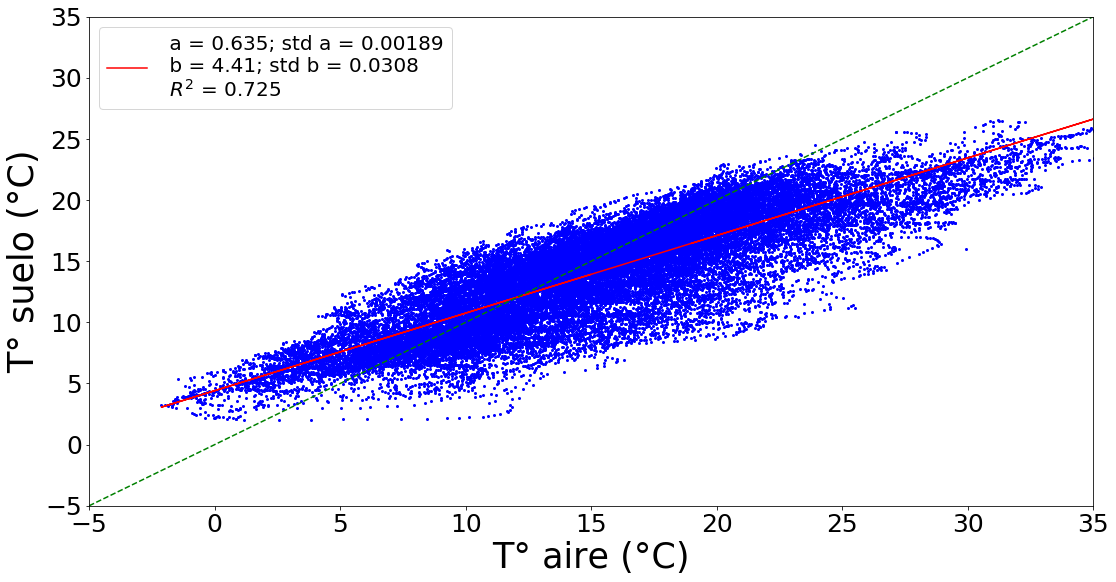

In [19]:
reg = regresion(lineal,
                x, y,
                inicial = [1, 0],
                pesos = None
                )
predicciones, ajuste, errores, r_cuadrado, residuo = reg
plt.figure(figsize = (18, 9))
metadata('T° aire (°C)', 'T° suelo (°C)')
grafico_modelo(x, y, predicciones,
               ajuste, errores,
               r_cuadrado,
               ['a', 'b'],
               )
plt.plot([-5, 35], [-5, 35], 'g--')
plt.xlim([-5, 35])
plt.ylim([-5, 35])
plt.savefig('C:\\Users\\nahue\\Desktop\\TvsT.png')

In [103]:
%%time
datos_conv['delta'] = datos_conv['TA1'] - datos_conv['TSS1']
datos_conv['hora'] = datos_conv['Momento'] - truncar(datos_conv['Momento'], 0)
horas = np.arange(0, 1 + 1/97, 1/96)
meses = ['01', '02', '03', '04',
         '05', '06', '07', '08',
         '09', '10', '11', '12'
        ]
anios = ['2018', '2019']
x = list(range(24))
promedio = list(range(24))
for anio in anios:
    for j in np.arange(0, 12, 2):
        m1 = meses[j]
        m2 = meses[j+1]
        for i in np.arange(0, 96, 4):
            desde = horas[i]
            hasta = horas[i+4]
            subset = datos_conv[(datos_conv['hora'] < hasta)
                                & (datos_conv['hora'] > desde)
                                & (datos_conv['TA1'] < 80)
                                & ((datos_conv['Fecha'].str[3:5] == m1)
                                   | (datos_conv['Fecha'].str[3:5] == m2)
                                  )
                                & (datos_conv['Fecha'].str[6:10] == anio)
                               ]
            promedio[int(i/4)] = subset['delta'].mean()
        plt.figure(figsize = (18, 9))
        plt.plot(x, promedio, 'o')
        metadata('Horas', 'Tair - Tsoil')
        plt.ylim([-2, 8])
        plt.savefig('C:\\Users\\nahue\\Desktop\\'
                    #+ 'Horario anual'
                     + anio + '_' + m1 + '_' + m2
                    + '.png'
                   )
        plt.close()

Wall time: 3.43 s


Wall time: 42.8 s


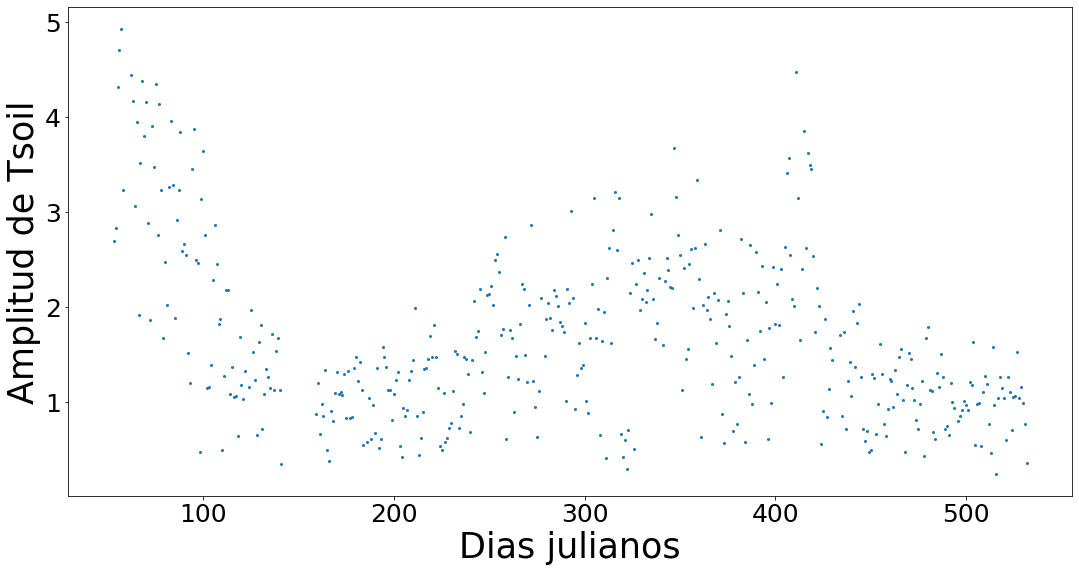

In [69]:
%%time
dias = ['01', '02', '03', '04',
        '05', '06', '07', '08',
        '09', '10', '11', '12',
        '13', '14', '15', '16',
        '17', '18', '19', '20',
        '21', '22', '23', '24',
        '25', '26', '27', '28',
        '29', '30', '31'
       ]
meses = ['01', '02', '03', '04',
         '05', '06', '07', '08',
         '09', '10', '11', '12'
        ]
anios = ['2018', '2019']
total = 2*12*31
#total = int(len(datos_conv['TA1'].values) / 96)
diferencia = list(range(total))
x = list(range(total))
i = 0
for anio in anios: 
    for mes in meses:
        for dia in dias:
            subset = datos_conv[(datos_conv['Fecha'].str[0:2] == dia)
                                & (datos_conv['Fecha'].str[3:5] == mes)
                                & (datos_conv['Fecha'].str[6:10] == anio)
                                & (datos_conv['TA1'] < 80)
                                ]
            maximo = subset['TSS1'].max()
            minimo = subset['TSS1'].min()
            diferencia[i] = (maximo - minimo)/2
            i = i + 1
plt.figure(figsize = (18, 9))
plt.plot(x, diferencia, 'o', ms = 2)
metadata('Dias julianos', 'Amplitud de Tsoil')
plt.savefig('C:\\Users\\nahue\\Desktop\\Delta_Tsoil.png')

Wall time: 44.6 s


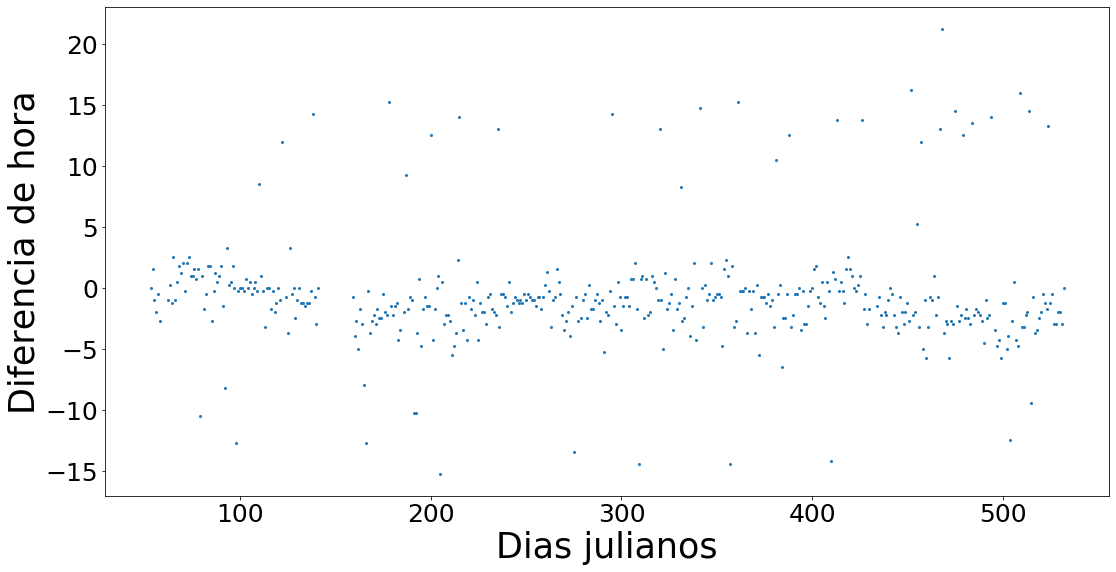

In [145]:
%%time
dias = ['01', '02', '03', '04',
        '05', '06', '07', '08',
        '09', '10', '11', '12',
        '13', '14', '15', '16',
        '17', '18', '19', '20',
        '21', '22', '23', '24',
        '25', '26', '27', '28',
        '29', '30', '31'
       ]
meses = ['01', '02', '03', '04',
         '05', '06', '07', '08',
         '09', '10', '11', '12'
        ]
anios = ['2018', '2019']
total = 2*12*31
diferencia = list(range(total))
x = list(range(total))
i = 0
for anio in anios: 
    for mes in meses:
        for dia in dias:
            subset = datos_conv[(datos_conv['Fecha'].str[0:2] == dia)
                                & (datos_conv['Fecha'].str[3:5] == mes)
                                & (datos_conv['Fecha'].str[6:10] == anio)
                                & (datos_conv['TA1'] < 80)
                                ]
            if subset.empty == False:
                i1 = subset[subset['TA1'] == subset['TA1'].max()].index[0]
                i2 = subset[subset['TSS1'] == subset['TSS1'].max()].index[0]
                h_aire = subset.loc[i1]['Momento']
                h_soil = subset.loc[i2]['Momento']
                diferencia[i] = (h_aire - h_soil)*24
            else:
                diferencia[i] = np.nan
            i = i + 1
plt.figure(figsize = (18, 9))
plt.plot(x, diferencia, 'o', ms = 2)
metadata('Dias julianos', 'Diferencia de hora')
plt.savefig('C:\\Users\\nahue\\Desktop\\Delta_Hora.png')

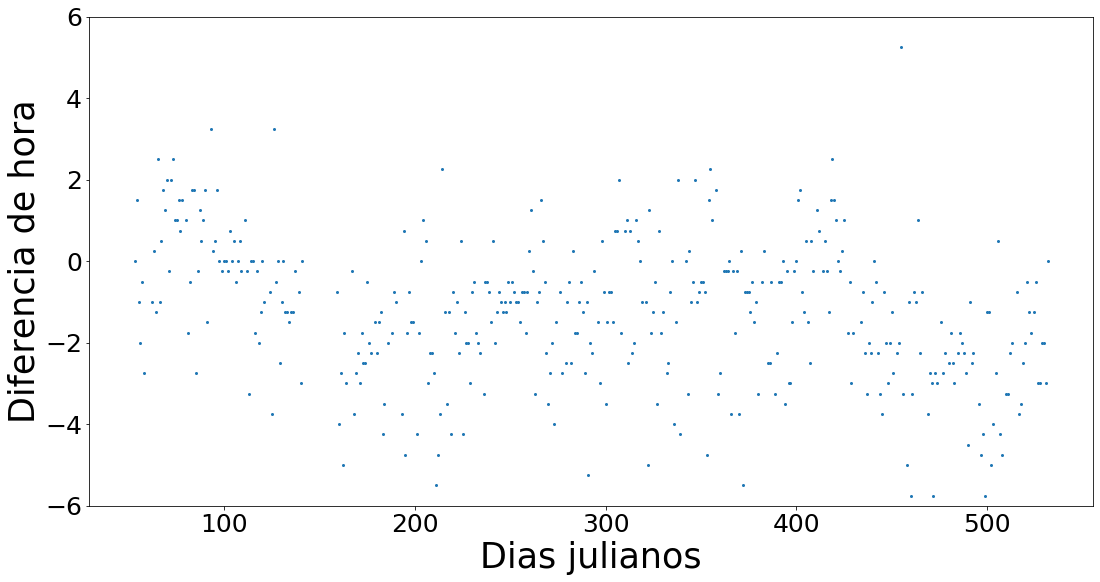

In [148]:
plt.figure(figsize = (18, 9))
plt.plot(x, diferencia, 'o', ms = 2)
metadata('Dias julianos', 'Diferencia de hora')
plt.ylim([-6, 6])
plt.savefig('C:\\Users\\nahue\\Desktop\\Delta_Hora_Zoom.png')

([<matplotlib.axis.XTick at 0x2b366490108>,
 <a list of 12 Text xticklabel objects>)

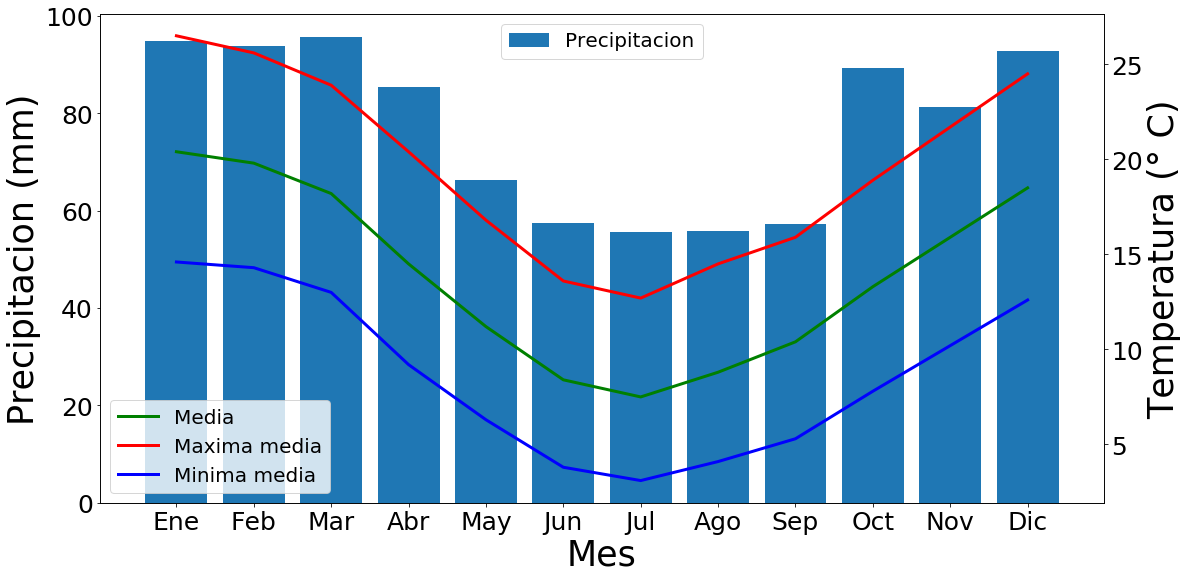

In [19]:
meses = estadisticas.columns[2:]
x = list(range(1,13))
fig, ax1 = plt.subplots(figsize = (18, 9))
metadata('Mes', 'Precipitacion (mm)')
y = estadisticas[meses].loc[3].values
ax1.bar(x, y)
ax2 = ax1.twinx()
color = ['g', 'r', 'b']
for i in [0, 1, 2]:
    y = estadisticas[meses].loc[i].values
    ax2.plot(x, y,
             linewidth = 3,
             color = color[i]
            )
metadata('Mes', 'Temperatura (° C)')
ax2.legend(['Media', 'Maxima media',
            'Minima media'
           ],
          fontsize = 20
          )
ax1.legend(['Precipitacion'],
          fontsize = 20
          )
plt.xticks(x, meses)
#plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Mardel_aero.png')

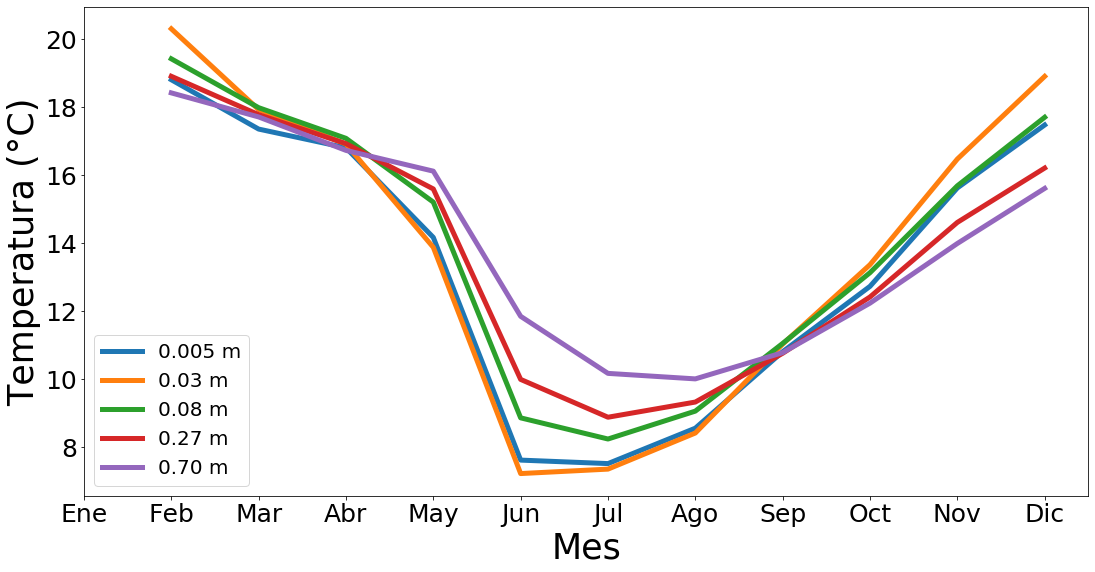

In [69]:
variable = ['TSS1', 'TS1', 'TS2', 'TS3', 'TS4']
dias = np.arange(0, 390, 30)
promedio = list(range(1, len(dias)))
x = list(range(1, 13))
plt.figure(figsize = (18, 9))
metadata('Mes', 'Temperatura (°C)')
for j in variable:
    for i in list(range(1, len(dias))):
        desde = dias[i-1]
        hasta = dias[i]
        promedio[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                                  & (datos_conv['Momento'] > desde)
                                  & (datos_conv[j] < 80)
                                  & (datos_conv['Fecha'].str[-1] == '8')
                                  ][j].mean()
    plt.plot(x, promedio, linewidth = 5)
plt.legend(['0.005 m', '0.03 m', '0.08 m', '0.27 m', '0.70 m'], fontsize= 20)
plt.xticks(x, meses)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Temperaturas_suelos.png')

In [7]:
variable = 'TA1'
datos_conv[(datos_conv['Momento'] < 90)
            & (datos_conv['Momento'] > 60)
            & (datos_conv[variable] < 80)
            & (datos_conv[variable] < 80)
            & (datos_conv['Fecha'].str[-1] == '8')
            ][variable].mean()

18.118141715873566

In [40]:
datos_conv['Fecha'].str[:2].unique

<bound method Series.unique of 0        23
1        23
2        23
3        23
4        23
         ..
44941    06
44942    06
44943    06
44944    06
44945    06
Name: Fecha, Length: 44946, dtype: object>

In [50]:
fecha.unique()

array(['23', '24', '25', '26', '27', '28'], dtype=object)

In [57]:
variable = 'TA1'
dias = np.arange(30, 390, 30)
promedio = list(range(1, len(dias)))
minimos = list(range(1, len(dias)))
maximos = list(range(1, len(dias)))
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    ventana = datos_conv[(datos_conv['Momento'] < hasta)
                        & (datos_conv['Momento'] > desde)
                        & (datos_conv[variable] < 80)
                        & (datos_conv['Fecha'].str[-1] == '8')
                        ]
    promedio[i-1] = ventana['TA1'].mean()
    count[i-1] = ventana['TA1'].count()
    acum[i-1] = ventana['PP'].sum()
    acum[i-1] = (acum[i-1]/count[i-1]) * 30*24*4
    fecha = ventana['Fecha'].str[:2]
    maximo = list(range(len(fecha.unique())))
    minimo = list(range(len(fecha.unique())))
    for j in range(len(fecha.unique())):
        dia = ventana[fecha == fecha.unique()[j]]
        maximo[j] = dia['TA1'].max()
        minimo[j] = dia['TA1'].min()
    minimos[i-1] = sum(minimo) / len(minimo)
    maximos[i-1] = sum(maximo) / len(maximo)
promedio = [np.nan] + promedio
minimos = [np.nan] + minimos
maximos = [np.nan] + maximos
print(promedio)

[nan, 19.305148148148145, 18.118141715873566, 17.558710462287102, 14.170530474040632, 7.887526929982046, 8.12058540200074, 9.292302333681643, 12.17027092740535, 13.268232025008682, 16.474647985989492, 18.688544568245124]


In [58]:
print(maximos)

[nan, 23.565, 24.581999999999994, 21.814666666666664, 17.92526315789474, 13.237083333333333, 11.436, 14.025333333333334, 17.616333333333333, 18.37166666666667, 21.763666666666666, 24.301]


In [59]:
print(minimos)

[nan, 14.393333333333333, 11.95533333333333, 13.732666666666669, 10.246842105263157, 3.3987499999999997, 4.969666666666666, 5.115666666666667, 7.7056666666666676, 8.583666666666664, 11.670333333333332, 13.326666666666663]


In [23]:
ta = datos_conv[(datos_conv['TA1'] < 80)
                & (datos_conv['Fecha'].str[-1] == '8')
               ]['TA1'].mean()
ta

13.979980668027064

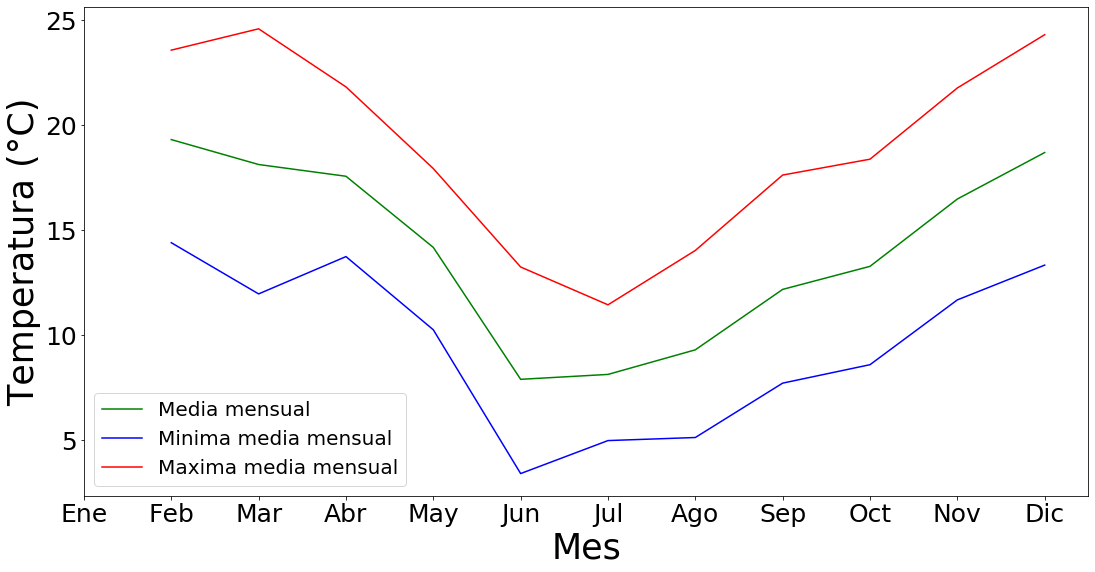

In [62]:
x = list(range(1, 13))
plt.figure(figsize = (18, 9))
plt.plot(x, promedio, color = 'green')
plt.plot(x, minimos, color = 'blue')
plt.plot(x, maximos, color = 'red')
metadata('Mes', 'Temperatura (°C)')
#plt.axhline(ta, ls = '--', color = 'black')
plt.legend(['Media mensual', 'Minima media mensual', 'Maxima media mensual'],#, 'Promedio'],
           fontsize = 20
          )
plt.xticks(x, meses)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Temperatura_aire.png')

In [16]:
datos_conv[(datos_conv['Momento'] > 313)
            & (datos_conv['Momento'] < 314)
            & (datos_conv['PP'] < 80)
            ]['PP'].sum()

49.88899999999999

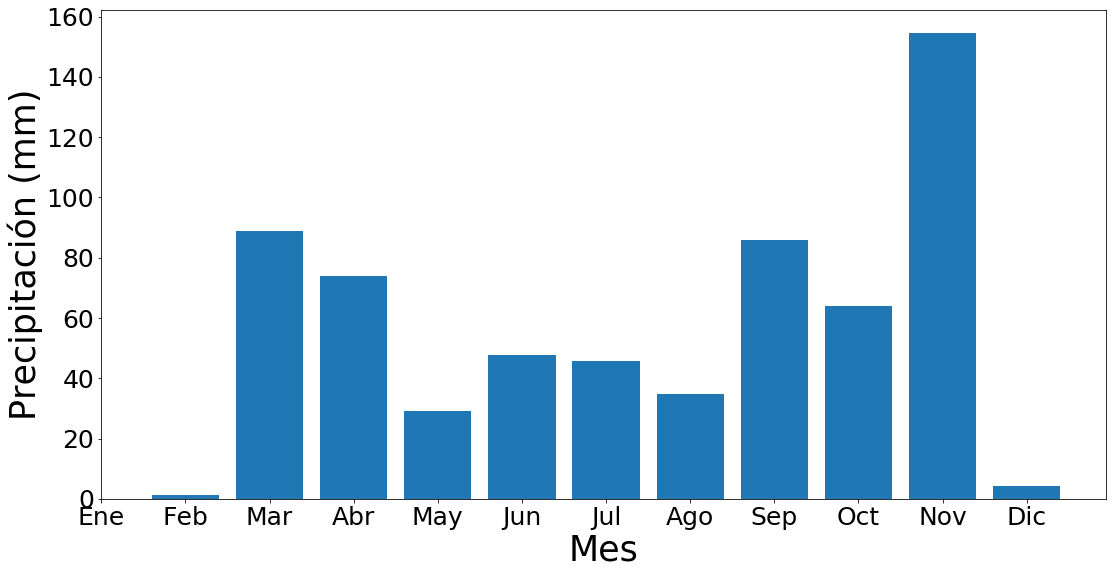

In [27]:
x = list(range(1, 13))
plt.figure(figsize = (18, 9))
plt.bar(x, acum)
metadata('Mes', 'Precipitación (mm)')
plt.xticks(x, meses)
#plt.legend(['PP acumulada'], fontsize= 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Precipitacion.png')

In [30]:
dias = np.arange(0, 390, 30)
camino = 'C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Viento\\'
bines = [0, 2, 4, 6, 8, 10, 12, 14]
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    ws = datos_conv[(datos_conv['TSS1']<80)
                    & (datos_conv['U']>0.1)
                    & (datos_conv['Momento'] < hasta)
                    & (datos_conv['Momento'] > desde)
                    & (datos_conv['Fecha'].str[-1] == '8')
                   ]['U']
    wd = datos_conv[(datos_conv['TSS1']<80)
                    & (datos_conv['U']>0.1)
                    & (datos_conv['Momento'] < hasta)
                    & (datos_conv['Momento'] > desde)
                    & (datos_conv['Fecha'].str[-1] == '8')
                   ]['DIR']
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed = True,
           opening = 0.8, edgecolor = 'white',
           bins = bines
          )
    #ax.set_legend()
    ax.set_yticks(np.arange(0, 30, step=5))
    ax.set_yticklabels(np.arange(0, 30, step=5))
    plt.savefig(camino + str(i) + '.png')
    plt.close()

C:\Users\nahue\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


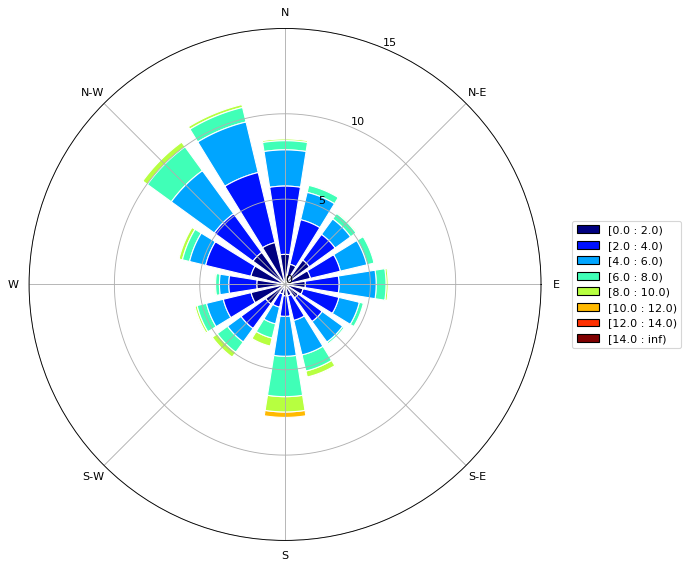

In [32]:
ws = datos_conv[(datos_conv['TSS1']<80)
                & (datos_conv['U']>0.1)
                & (datos_conv['Fecha'].str[-1] == '8')
                ]['U']
wd = datos_conv[(datos_conv['TSS1']<80)
                & (datos_conv['U']>0.1)
                & (datos_conv['Fecha'].str[-1] == '8')
                ]['DIR']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed = True,
        opening = 0.8, edgecolor = 'white',
        bins = bines
        )
ax.set_yticks(np.arange(0, 20, step=5))
ax.set_yticklabels(np.arange(0, 20, step=5))
ax.set_legend()
plt.legend(loc = 'center left', bbox_to_anchor = (1.05, 0.5))
plt.savefig(camino + 'Viento.png')

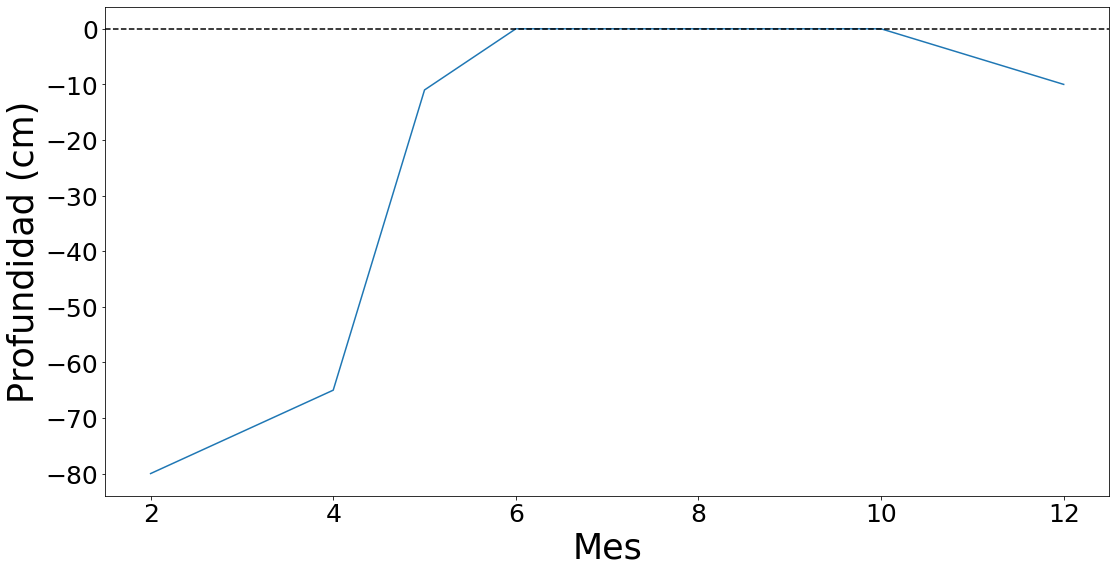

In [35]:
x = [2, 4, 5, 6, 7, 10, 12]
napa = [-80, -65, -11, 0, 0, 0, -10]
plt.figure(figsize=(18,9))
plt.plot(x, napa)
plt.axhline(0, color = 'black', ls = '--')
metadata('Mes', 'Profundidad (cm)')
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Napa.png')

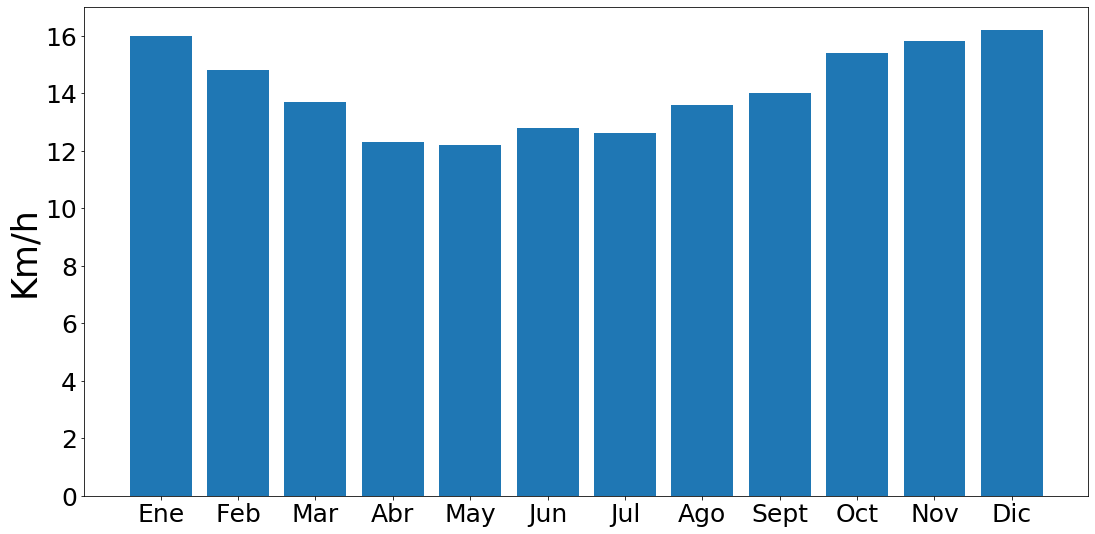

In [15]:
velocidad = [16.0, 14.8, 13.7, 12.3,
             12.2, 12.8, 12.6, 13.6,
             14.0, 15.4, 15.8, 16.2
            ]
meses = ['Ene', 'Feb', 'Mar',
         'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sept',
         'Oct', 'Nov', 'Dic'
         ]
plt.figure(figsize=(18,9))
plt.bar(meses, velocidad)
#plt.xticks(rotation=-30)
metadata('', 'Km/h')
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Viento_mardel.png')